Juan Miguel Gutierrez Vidal

Juan Camilo Llanos

# Solución al problema de Mini-damas

Las  damas  inglesas,  o  mas  conocida  como  “chekers”,  es  uno  de  los  juegos  m ́as  viejos  que  hansobrevivido al paso del tiempo.El juego de las damas posee cerca de 500 billones de billones deposibles posiciones (5×1020).  Dado la complejidad computacional necesaria para solucionar el juego, decidimosconvertirlo en un mini-damas de (4×4), con 4 fichas. Para solucionar un juego de 10 fichas, esnecesario guardar las posiciones en 237 GB ,ya que para 10 fichas en un tablero de 8×8, existen39, trillones de posiciones. 

\begin{figure}[H]
    \centering
    \includegraphics[width=2cm]{./Imagenes_informe/minidamas.jpg} }}%
\end{figure}

## Reglas Mini-Damas

\begin{itemize}
    \item \textbf{Objetivo:} Eliminar todas las fichas del oponente.
    \item \textbf{Numero de jugadores:} 2, uno juega con fichas blancas y otro con negras.
    \item \textbf{Configuración:} Cada jugador hace sus jugadas por turnos en un tablero $4\times4$. Cada uno inicia con dos fichas: Las blancas inician con las dos fichas en la posición $(0,0)$ y $(2,0)$. Las negras inician con las dos fichas en la posición $(1,3)$ y $(3,3)$ (Figura \ref{fig:config1}).
    \item \textbf{Movimientos}: 
    \begin{itemize}
        \item Los peones siempre se mueven diagonalmente hacia adelante, hacia el lado del oponente (Figura \ref{fig:config1}).
        \item Para mover un peón en un espacio diagonal , es necesario que el espacio se encuentre vacío. Si el espacio se encuentra ocupado por una ficha del oponente  y se encuentra el espacio diagonal en la misma dirección vacía, se mueve a este espacio vacío y se captura la ficha del contrincante (Figura \ref{fig:config2}).
        \item Si todos los cuadrados adyacentes (Diagonales) al peón, se encuentran ocupados, el peón no se podrá mover (Figura \ref{fig:config2}).
    \end{itemize}
    \item \textbf{Reinas:} Si las fichas llegan a la primera fila del bando el oponente, se convierten en reinas, estas pueden moverse  y comer diagonalmente hacia atrás y adelante.
    \item \textbf{Ganador:} El primer jugador que capture todas las damas del oponente , gana !
    \item \textbf{Empate:}: Se considera empate si después de 10 movidas ninguna ficha se come a otra.(En las damas $8\times8$ son entre 40 y 50 movimientos \cite{lib1})
    
\end{itemize}

### Definicion Formal

La solución al problema requiere una definición formal previa a la implementación en python, que es la siguiente:

\noindent \textbf{Estado Inicial:} Situación del entorno desde el cual comienza el juego. En el caso de las damas, el estado inicial es el tablero con las 2 fichas de cada bando en sus posiciones respectivas.

\noindent \textbf{Turno($s$)-Jugador($s$):} Define cuál jugador tiene el turno en el estado $s$, el cual puede ser \textit{blancas} o \textit{negras}. (Realmente es un propiedad del objeto damas, no una función).

\noindent \textbf{Llenar($s$):} Llena el tablero con la configuración inicial del juego. Se debe correr este método al inicializar el objeto damas (El juego).

\noindent \textbf{Posibles acciones($s$):} Descripción de las posibles acciones del Jugador($s$), dado un estado $s$. En este caso, para cada ficha del jugador los posibles movimientos que puede realizar en un movimiento.

\noindent \textbf{Funciones de transiciones ($s,f,m$):} Descripción del entorno que resulta de la ejecución de mover la ficha $f$ utilizando el movimiento $m$, por el Jugador($s$) en el estado $s$. Junto con el estado inicial y las posibles acciones, la función de transiciones define el espacio de estados del juego.

\noindent \textbf{Prueba de objetivo ($s$):} Permite determinar si el juego se termina cuando se obtiene el estado $s$. Esto sucede si algún jugador, no tiene fichas con las que jugar, o han pasado mas de 10 jugadas sin comerse una ficha.

\noindent \textbf{Función de utilidad ($s$):} Definida sólo cuando el juego se termina en el estado $s$, y especifica la utilidad asociada al estado $s$. En el caso de las damas asumiremos que si el ganador son las \textbf{blancas}, la utilidad es 1; si el ganador son las \textit{negras}, la utilidad es -1; en caso de empate, la utilidad es 0.

\begin{figure}[H]
    \centering
    \includegraphics[width=2cm]{./Imagenes_informe/jupyter1.png} }}%
\end{figure}

\begin{figure}[H]
    \centering
    \includegraphics[width=2cm]{./Imagenes_informe/jupyter2.png} }}%
\end{figure}

## Simplificacion
1. Si una ficha come otra, sigue el turno del siguiente contricante.
2. 4x4
3. Si despues de 10 turnos, ninguna ficha nueva ha sido comida, es empate (se considera 40 movidas para que sea empate).

### Implementacion

In [80]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.offsetbox import AnnotationBbox, OffsetImage
import numpy as np
from random import choice
import copy
import operator
from IPython.display import clear_output
import time

%matplotlib inline

In [88]:
class damas:
    
    def __init__(self):
        self.estado = None# matriz 4x4
        self.blancas = [] # # lista de posiciones (x,y) de fichas blancas
        self.negras = [] # # lista de posiciones (x,y) de fichas negras
        self.turno = 2  # primero comienzan blancas
        self.reinas_blancas= [] # #reinas son figuras que coronan hasta la última linea
        self.reinas_negras= [] #  #reinas son figuras que coronan hasta la última linea
        self.empate = 0 #
    
    def estado_inicial(self):
        return np.matrix([[0]*4]*4)
    
    def pintar_estado(self, estado):
        # Dibuja el tablero correspondiente al estado
        # Input: estado, que es una 3-lista de 3-listas
        fig, axes = plt.subplots(figsize=(9,8))

        # Dibujo el tablero
        step = 1./4
        offset = 0.001
        tangulos = []

        # Borde del tablero
        tangulos.append(patches.Rectangle((0,0),0.998,0.998,\
                                          facecolor='cornsilk',\
                                         edgecolor='black',\
                                         linewidth=2))

        # Creo las líneas del tablero
        for j in range(4):
            locacion = j * step
            # Crea linea horizontal en el rectangulo
            tangulos.append(patches.Rectangle(*[(0, locacion), 1, 0.008],\
                    facecolor='black'))
            # Crea linea vertical en el rectangulo
            tangulos.append(patches.Rectangle(*[(locacion, 0), 0.008, 1],\
                    facecolor='black'))

        for t in tangulos:
            axes.add_patch(t)

        # Cargando imagen de O
        arr_img_O = plt.imread("./imagenes/negra.png", format='png')
        image_O = OffsetImage(arr_img_O, zoom=0.13)
        image_O.image.axes = axes

        # Cargando imagen de X
        arr_img_X = plt.imread("./imagenes/blanca.png", format='png')
        image_X = OffsetImage(arr_img_X, zoom=0.13)
        image_X.image.axes = axes

        offsetX = 0.13
        offsetY = 0.13

        # ASUMO QUE LAS 'blancas' SE REPRESENTAN CON 1 EN LA MATRIZ
        # Y QUE LAS 'negras' SE REPRESENTAN CON 2
        for i in range(4):
            for j in range(4):
                if estado[j, i] == 1:
                    # print("O en (" + str(i) + ", " + str(j) + ")")
                    Y = 3 - j
                    X = i
                    # print("(" + str(X) + ", " + str(Y) + ")")
                    ab = AnnotationBbox(
                        image_O, 
                        [(X*step) + offsetX, (Y*step) + offsetY], 
                        frameon=False)
                    axes.add_artist(ab)
                if estado[j, i] == 2:
                    # print("X en (" + str(i) + ", " + str(j) + ")")
                    Y = 3 - j
                    X = i
                    # print("(" + str(X) + ", " + str(Y) + ")")
                    ab = AnnotationBbox(
                        image_X, 
                        [(X*step) + offsetX, (Y*step) + offsetY], 
                        frameon=False)
                    axes.add_artist(ab)
        
        axes.axis('off')
        return axes
    
    
##################################################### ACCIONES APLICABLES ######################################################

    def acciones_aplicables(self, estado):
        # Devuelve una lista de parejas que representan las casillas vacías
        # Input: estado, que es una np.matrix(8x8)
        # Output: dictionario de movimientos de cada ficha del turno del jugador
        movimientos={}
        if self.turno == 1: # si juegan las 'negras'
            
            ## NORMALES NEGRAS
            for posicion in self.negras: #mirando los posibles movimientos de las negras
                pos_x = posicion[0]
                pos_y = posicion[1]
                #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                if pos_x>=1 and pos_y>=1:
                    if estado[pos_y-1,pos_x-1]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
                if pos_x<=2 and pos_y>=1:
                    if estado[pos_y-1,pos_x+1]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y-1))
            ## Comida de otra ficha
                if pos_x>=2 and pos_y>=2:
                    if estado[pos_y-1,pos_x-1]==2 and estado[pos_y-2,pos_x-2]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-2,pos_y-2))
                if pos_x<=1 and pos_y>=2:
                    if estado[pos_y-1,pos_x+1]==2 and estado[pos_y-2,pos_x+2]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+2,pos_y-2))
                        
                        

            for posicion in self.reinas_negras: #mirando los posibles movimientos de las negras
                pos_x = posicion[0]
                pos_y = posicion[1]
                #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                if pos_x>=1 and pos_y>=1:
                    if estado[pos_y-1,pos_x-1]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
                if pos_x<=2 and pos_y>=1:
                    if estado[pos_y-1,pos_x+1]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y-1))
                if pos_x<=2 and pos_y<=2:
                    if estado[pos_y+1,pos_x+1]==0 :#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y+1))
                if pos_x>=1 and pos_y<=2:
                    if estado[pos_y+1,pos_x-1]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y+1))
            ## Comida de otra ficha
                if pos_x>=2 and pos_y>=2:
                    if estado[pos_y-1,pos_x-1]==2 and estado[pos_y-2,pos_x-2]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-2,pos_y-2))
                if pos_x<=1 and pos_y>=2:
                    if estado[pos_y-1,pos_x+1]==2 and estado[pos_y-2,pos_x+2]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+2,pos_y-2))
                if pos_x<=1 and pos_y<=1:
                    if estado[pos_y+1,pos_x+1]==2 and estado[pos_y+2,pos_x+2]==0:#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+2,pos_y+2)) 
                if pos_x>=2 and pos_y<=1:
                    if estado[pos_y+1,pos_x-1]==2 and estado[pos_y+2,pos_x-2]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-2,pos_y+2))
        
        
        
        
        elif self.turno == 2: # si juegan las 'blancas'
            ## NORMALES BLANCAS
            for posicion in self.blancas: #mirando los posibles movimientos de las blancas
                pos_x = posicion[0]
                pos_y = posicion[1]
                #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                if pos_x<=2 and pos_y<=2:
                    if estado[pos_y+1,pos_x+1]==0 :#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y+1))
                if pos_x>=1 and pos_y<=2:
                    if estado[pos_y+1,pos_x-1]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y+1))
            ## Comida de otra ficha
                if pos_x<=1 and pos_y<=1:
                    if estado[pos_y+1,pos_x+1]==1 and estado[pos_y+2,pos_x+2]==0:#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+2,pos_y+2)) 
                if pos_x>=2 and pos_y<=1:
                    if estado[pos_y+1,pos_x-1]==1 and estado[pos_y+2,pos_x-2]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-2,pos_y+2))
                        
                        

            for posicion in self.reinas_blancas: #mirando los posibles movimientos de las negras
                pos_x = posicion[0]
                pos_y = posicion[1]
                #dic.setdefault(key,[]).append(value), lo que hace es agregar valor si no existe, y si no lo añade a la lista
                if pos_x>=1 and pos_y>=1:
                    if estado[pos_y-1,pos_x-1]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
                if pos_x<=2 and pos_y>=1:
                    if estado[pos_y-1,pos_x+1]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y-1))
                if pos_x<=2 and pos_y<=2:
                    if estado[pos_y+1,pos_x+1]==0 :#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+1,pos_y+1))
                if pos_x>=1 and pos_y<=2:
                    if estado[pos_y+1,pos_x-1]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y+1)) 
            ## Comida de otra ficha
                if pos_x>=2 and pos_y>=2:
                    if estado[pos_y-1,pos_x-1]==1 and estado[pos_y-2,pos_x-2]==0: #⬉
                        movimientos.setdefault(posicion,[]).append((pos_x-2,pos_y-2))
                if pos_x<=1 and pos_y>=2:
                    if estado[pos_y-1,pos_x+1]==1 and estado[pos_y-2,pos_x+2]==0:#⬈
                        movimientos.setdefault(posicion,[]).append((pos_x+2,pos_y-2))
                if pos_x<=1 and pos_y<=1:
                    if estado[pos_y+1,pos_x+1]==1 and estado[pos_y+2,pos_x+2]==0:#⬊
                        movimientos.setdefault(posicion,[]).append((pos_x+2,pos_y+2)) 
                if pos_x>=2 and pos_y<=1:
                    if estado[pos_y+1,pos_x-1]==1 and estado[pos_y+2,pos_x-2]==0 :#⬋
                        movimientos.setdefault(posicion,[]).append((pos_x-2,pos_y+2))
                
        return movimientos
    
################################################################################################################################    
    
    def llenar(self,estado):
        # Llena el tablero con las posiciones iniciales
        # Input: estado, qie es una np.matrix(8x8)
        # Output : estado, con el tablero llenado, listo para jugar
        blancas =[(0,0),(2,0)] #(x,y) = (⮕,⬇)
        negras =[(1,3),(3,3)]
        #Falta agregar negras
        for posicion in blancas: #llenando con fichas blancas
            # estado[(y,x)]
            estado[posicion[1],posicion[0]]=2
        for posicion in negras: #llenando con fichas negras
            # estado[(y,x)]
            estado[posicion[1],posicion[0]]=1        
        self.estado = estado
        self.blancas = blancas
        self.negras = negras
        return estado
    
    def llenar1(self,estado):
        blancas =[(2,0)] #(x,y) = (⮕,⬇)
        negras =[(3,1)]
        #Falta agregar negras
        for posicion in blancas: #llenando con fichas blancas
            # estado[(y,x)]
            estado[posicion[1],posicion[0]]=2
        for posicion in negras: #llenando con fichas negras
            # estado[(y,x)]
            estado[posicion[1],posicion[0]]=1        
        self.estado = estado
        self.blancas = blancas
        self.negras = negras
        return estado

    def transicion(self, estado,ficha,movimiento):
        # Devuelve el tablero incluyendo una O o X en el indice,
        # dependiendo del jugador que tiene el turno
        # Input: estado, que es una np.matrix(8x8)
        #        indice, de la forma (x,y)
        # Output: estado, que es una np.matrix(8x8)
        
        s = copy.deepcopy(estado)
        jugador = self.turno
        s[ficha[1],ficha[0]]= 0 #eliminando posicion antigua ficha
        s[movimiento[1],movimiento[0]] = jugador #agregando movimiento
        if jugador == 2: # mueve blancas
            self.turno =1 #cambia turno a negras
            if ficha in self.blancas : 
                self.blancas.remove(ficha) #elimina posicion en lista blancas
                if movimiento[1] != 3:
                    self.blancas.append(movimiento)
                elif movimiento[1]==3:
                    self.reinas_blancas.append(movimiento)
            elif ficha in self.reinas_blancas:
                    self.reinas_blancas.remove(ficha) 
                    self.reinas_blancas.append(movimiento)
            # Caso se movio diagonal comiendo
            if abs(movimiento[1]-ficha[1])==2 or abs(movimiento[0]-ficha[0])==2:
                #print("comio blancas")
                self.empate = -1 # si se come una ficha se reinicia conteo para empate, -1 por que despues se suma 1, evitar mas operacionas
                # movimiento (y,x)
                if movimiento[1]>ficha[1] and movimiento[0]>ficha[0]:
                    #print("Entro")
                    ficha = (movimiento[1]-1,movimiento[0]-1)
                    print(ficha)
                elif movimiento[1]>ficha[1] and movimiento[0]<ficha[0]:    
                    ficha = (movimiento[1]-1,ficha[0]-1)
                elif movimiento[1]<ficha[1] and movimiento[0]<ficha[0]:    
                    ficha = (ficha[1]-1,ficha[0]-1)                
                elif movimiento[1]<ficha[1] and movimiento[0]>ficha[0]:    
                    ficha = (ficha[1]-1,movimiento[0]-1)      
                    
                s[ficha[1],ficha[0]]=0
                #print("sel_blancas :",self.blancas)
                #print("sel_negras :",self.negras)
                if ficha in self.negras:
                    #print("eliminada")
                    self.negras.remove(ficha)
                elif ficha in self.reinas_negras: self.reinas_negras.remove(ficha) 
                    
        elif jugador == 1: # mueve negras
            self.turno =2 #cambia turno a blancas
            if ficha in self.negras : 
                self.negras.remove(ficha) #elimina posicion en lista blancas
                if movimiento[1] != 0:
                    self.negras.append(movimiento)
                elif movimiento[1]==0:
                    self.reinas_negras.append(movimiento)
            elif ficha in self.reinas_negras:
                    self.reinas_negras.remove(ficha) 
                    self.reinas_negras.append(movimiento)   
            if abs(movimiento[1]-ficha[1])==2 or abs(movimiento[0]-ficha[0])==2:
                #print("comio negras")
                self.empate = -1 # si se come una ficha se reinicia conteo para empate
                # movimiento (y,x)
                if movimiento[1]>ficha[1] and movimiento[0]>ficha[0]:
                    ficha = (movimiento[1]-1,movimiento[0]-1)
                elif movimiento[1]>ficha[1] and movimiento[0]<ficha[0]:    
                    ficha = (movimiento[1]-1,ficha[0]-1)
                elif movimiento[1]<ficha[1] and movimiento[0]<ficha[0]:    
                    ficha = (ficha[1]-1,ficha[0]-1)                
                elif movimiento[1]<ficha[1] and movimiento[0]>ficha[0]:    
                    ficha = (ficha[1]-1,movimiento[0]-1)
                    
                s[ficha[1],ficha[0]]=0     
                if ficha in self.blancas: self.blancas.remove(ficha)
                elif ficha in self.reinas_blancas: self.reinas_blancas.remove(ficha)                     
        self.estado = s
        self.empate = self.empate +1
        return s
    
    def test_objetivo(self, estado):
        # Devuelve True/False dependiendo si el juego se acabó
        # Input: estado, que es una np.matrix(8x8)
        # Output: objetivo, True/False
        # print("Determinando si no hay casillas vacías...")
        # ⚠️ Modificar self empate : facil identificacino
        if self.empate >=9:
            return True
        if len(self.blancas)==0 and len(self.reinas_blancas)==0: # No existen mas fichas blancas
            return True
        if len(self.negras)==0 and len(self.reinas_negras)==0: # No existen mas fichas negras
            return True
        else:
            movimientos = self.acciones_aplicables(estado)
            if (not movimientos) == True: #si ya no hay mas posibles movimientos para un jugador
                return True
            else:            # Si hay fichas que todavian pueden moverse           
                return False 

    def utilidad(self, estado):
        # Devuelve la utilidad del estado donde termina el juego
        # Input: estado, que es una np.matrix(3x3)
        # Output: utilidad, que es un valor -1, 0, 1
        obj = self.test_objetivo(estado)
        # ⚠️ Modificar self empate : facil identificacino
        if self.empate >=9: # se considera empate,si despues 40 movidas nadie se come a otra ficha, disminuimos a 10
            # por costo computacional y saber si funciona correctamente
            return 0
        if obj:
            if len(self.blancas)==0 and len(self.reinas_blancas)==0: # No existen mas fichas blancas
                return -1 # ganaron negras
            if len(self.negras)==0 and len(self.reinas_negras)==0: # No existen mas fichas negras
                return 1  # ganaron blancas
            else:
                movimientos = self.acciones_aplicables(estado) #movimientos posibles del turno actual
                if (not movimientos) == True: #si ya no hay mas posibles movimientos para un jugador
                    if self.turno == 2: #las blancas no se pueden mover
                        return -1 #ganan negras
                    else:  #las negras no se pueden mover
                        return 1 #ganan blancas
        

        return None

## 💯 Pruebas Unitarias de funcionamiento

### Llenar tablero inicial

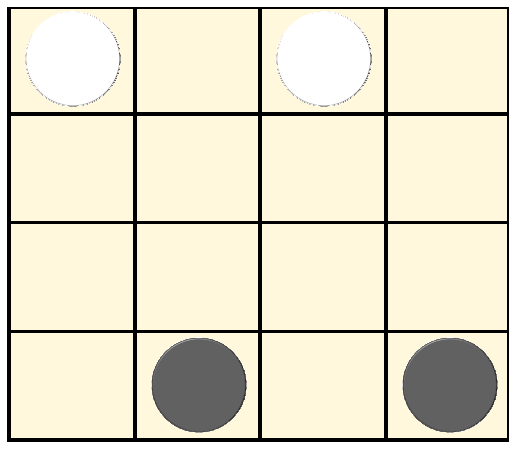

In [82]:
D = damas()
s = D.estado_inicial()
s = D.llenar(s)
D.pintar_estado(s)

### Ver movimientos

Es posible llevar que el juego funciona correctamente corriendo estas dos celdas iterativamente, la primera para las fichas blancas y la segunda para las fichas negras

#### Blancas

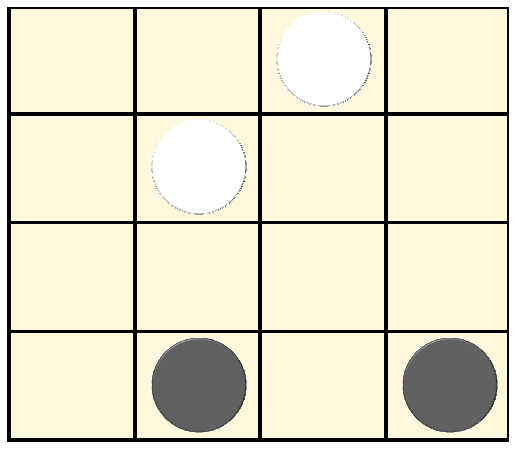

In [84]:
mov = D.acciones_aplicables(s)
ficha , movimientos_ficha = choice(list(mov.items()))
movimiento_ficha = choice(movimientos_ficha)
s = D.transicion(s,ficha,movimiento_ficha)
D.pintar_estado(s)

#### Negras

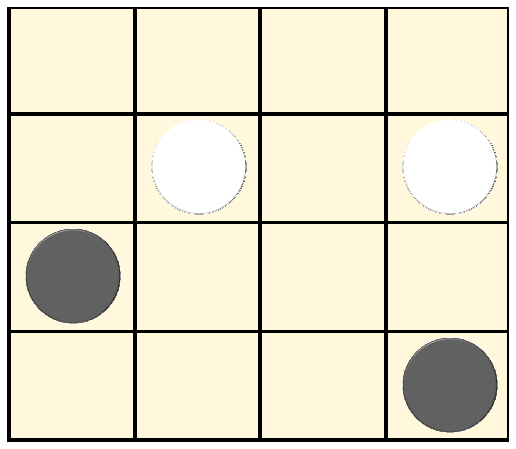

In [86]:
mov = D.acciones_aplicables(s)
ficha , movimientos_ficha = choice(list(mov.items()))
movimiento_ficha = choice(movimientos_ficha)
s = D.transicion(s,ficha,movimiento_ficha)
D.pintar_estado(s)

### Árbol de confrontación

Debemos ahora definir un programa para el agente que juega mini-damas. Este programa debe consistir, de manera general, en una función que percibe un tablero de dama y devuelve una acción (Ficha y movimiento). Más concretamente, el agente recibe un estado `s` y devuelve un mapa  `Ficha:[Movimientos]` `(x,y):[(x_1,y_1),(x_2,y_2)]`, en el cual ha de ponerse la dama correspondiente (o bien $blancas$ o bien $negras$). 

los algoritmos que utilizaremos para definir el programa se llamaran *minmax* y *ab_decision*. El nombre de *minmax* es muy acertado, toda vez que evoca simultáneamente la confrontación entre los jugadores así como la manera como se representa dicha confrontación. Esto es, un jugador buscará el mínimo y el otro el máximo de la utilidad. Esta es la razón por la cual se definió la función de utilidad de tal manera que un estado en el que gane el jugador de las $negras$ vale -1 y uno en que gane el jugador de las $blancas$ vale 1. El primer jugador será `min` y el segundo `max`. El nombre de $\alpha-\beta$ surge de que es una capa que mejora el proceso computacional de *minmax*, esto es una vez encuentra un maximo, y el siguiente es es menor que este maximo, se deduce que la mejor eleccion es este máximo.

Dado un estado `s`, se define un árbol de confrontación para `s` de la siguiente manera. Se consideran todas las acciones aplicables (ficha y movmiento) de `Jugador(s)`, y para cada una de ellas se encuentra el correspondiente estado `s`$_i$. Luego, para cada uno de estos, se consideran todas las acciones aplicables de `Jugador(s`$_i$`)` y se encuentran los correspondientes estados. Así hasta llegar a los estados en los cuales el juego se termina.

Ahora debemos considerar cómo se obtienen los valores minmax a partir de la utilidad asignada a los estados en los cuales el juego se termina. También debemos entender cómo funciona la toma de decisiones una vez construido el árbol con los respectivos valores minmax en cada nodo. Explicaremos primero esto último, con base en el siguiente ejemplo:

\begin{figure}[H]
    \centering
    \includegraphics[width=2cm]{./Imagenes_informe/jupyter3.png} }}%
\end{figure}

Supongamos que nos es dado el árbol de confrontación anterior, construido a partir del estado inicial, que se encuentra en la raíz. No obstante, observe que en la figura sólo se nos muestra una parte del árbol, en el cual el juego ya ha avanzado. En el nodo que vemos más arriba, el jugador de las $blancas$ es quien tiene el turno, es decir, juega `max`. Él debe seleccionar la opción que le reporte el máximo de los valores minmax de sus hijos. En este caso, debe seleccionar la única opción con valor 1. Observe que, si seleccionara cualquier otra opción (las cuales tienen valor $\{-1,0\}$, entonces `min` ganaría (esto es, suponiendo que `min` juega de la mejor manera posible).

Volviendo a la explicación, `max` selecciona la opción de más a la izquierda, en la que captura la dama $negra$. Consideremos ahora el juego desde el punto de vista de $negras$. En este turno el jugador $negro$ debe seleccionar la opción con menor valor minmax, en este caso, la opción con valor en la que no se encuentre capturada su ficha. No sabemos con seguridad por que el arbol sigue creciendo de manera indefinida (El arbol termina siendo muy grande).

### Algoritmo minmax

El siguiente es el pseudo código del algoritmo de decisión minmax, el cual genera, mediante una metodología deep-first, el árbol de confrontación para un estado dado `s` en el cual le corresponde el turno a `max`:

\begin{figure}[H]
    \centering
    \includegraphics[width=2cm]{./Imagenes_informe/jupyter4.png} }}%
\end{figure}

## Implementación Min-Max

En el siguiente codigo implementamos el pseudocodigo en nuestro juego (Claramente el psudocodigo esta ajustado para nuestro juego).

In [95]:
def min_value(juego, estado):
    if juego.test_objetivo(estado):
        return juego.utilidad(estado)
    else:
        lista = []
        movimientos = juego.acciones_aplicables(estado)
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.append(max_value(juego, juego.transicion(estado, ficha,mov)))
        return min(lista)        
                
            

def max_value(juego, estado):
    if juego.test_objetivo(estado):
        return juego.utilidad(estado)
    else:
        lista = []
        movimientos = juego.acciones_aplicables(estado)
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.append(min_value(juego, juego.transicion(estado, ficha,mov)))
        return max(lista)    

def minimax_decision(juego, estado):
    # movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
    # Retorna la acción optima en el estado, para el jugador que lleva el turno
    movimientos = juego.acciones_aplicables(estado)
    print("Movimientos :",movimientos)
    juego1 = copy.deepcopy(juego) #⚠️ guardando copia previa del min max
    lista = {}
    if juego.turno==2:
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.setdefault(ficha,[]).append(max_value(juego, juego.transicion(estado, ficha,mov)))
        juego.turno =2
    
    elif juego.turno==1:
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.setdefault(ficha,[]).append(min_value(juego, juego.transicion(estado, ficha,mov)))
        juego.turno =1
    print("Movimientos : Puntajes -> ",lista)
    ficha = max(lista, key=lista.get) # obtiene la ficha que se debe mover para mayor ganancia
    indice = np.argmax(max(lista.values())) # obtiene el movimiento que causa mayor ganancia
    juego = copy.deepcopy(juego1) # el min max modifica el estao del juego ! 
    #print("Ficha: ",ficha,"Movimientos :",movimientos[ficha],"Indice :",indice)
    return ficha,movimientos[ficha][indice],juego

## Reinicio Juego

Reiniciaremos el juego a su configuracion inicial

Movimientos : {(0, 0): [(1, 1)], (2, 0): [(3, 1), (1, 1)]}
(2, 2)
Movimientos : Puntajes ->  {(0, 0): [-1], (2, 0): [-1, -1]}
Computador juega en (Ficha,movimiento) -> (2, 0) (3, 1)


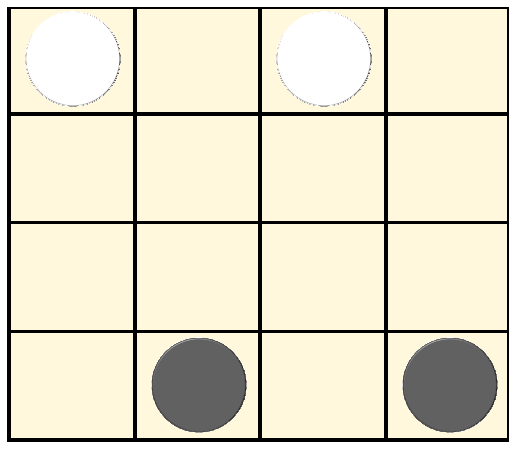

In [96]:
D = damas()
s = D.estado_inicial()
s = D.llenar(s)
D.pintar_estado(s)
ficha, movimiento_ficha, D = minimax_decision(D, s)
print("Computador juega en (Ficha,movimiento) ->", ficha, movimiento_ficha)

## Simulación min-max


El siguiente codigo muestra en tiempo real como van jugando las dos maquinas encontra. (No deberia verse todas la imagenes, si no como se va jugando).

Si desea, puede aumentar el tiempo de demora, para ver mas lento que esta sucediendo en el juego (`time.sleep()`)

%matplotlib inline

Movimientos : {(1, 1): [(0, 0), (2, 2), (0, 2)]}
Movimientos : Puntajes ->  {(1, 1): [0, 0, 0]}
Negra:  [(3, 3)]
Reinas Negras:  [(2, 0)]
Blancas:  []
Reinas Blancas:  [(0, 0)]
Turno:  1


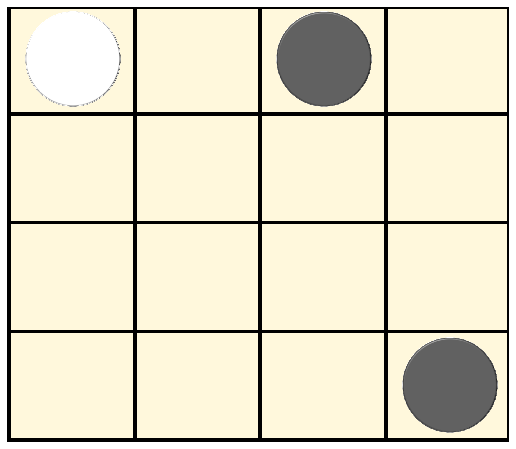

In [97]:
D = damas()
s = D.estado_inicial()
s = D.llenar(s)
D.pintar_estado(s)
ficha, movimiento_ficha, D = ab_decision(D, s)
print("Ficha :",ficha, "Movimiento :",movimiento_ficha)
print("Negra: ",D.negras)
print("Reinas Negras: ",D.reinas_negras)
print("Blancas: ",D.blancas)
print("Reinas Blancas: ",D.reinas_blancas)
print("Turno: ",D.turno)
time.sleep(1)

while D.test_objetivo(s) == False:
    clear_output(wait=True)
    ficha, movimiento_ficha, D = minimax_decision(D, s)
    s = D.transicion(s,ficha, movimiento_ficha)
    D.pintar_estado(s)
    print("Negra: ",D.negras)
    print("Reinas Negras: ",D.reinas_negras)
    print("Blancas: ",D.blancas)
    print("Reinas Blancas: ",D.reinas_blancas)
    print("Turno: ",D.turno)
    plt.show()
    time.sleep(1)

## Alpha Beta


En la siguiente veremos la simulación implementando el algoritmo alfa-beta, veremos que obtenemos el mismo resultado que min-max !

In [98]:
def min_value_ab(juego, estado,alfa,beta):
    if juego.test_objetivo(estado):
        return juego.utilidad(estado)
    else:
        lista = []
        movimientos = juego.acciones_aplicables(estado)
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.append(max_value(juego, juego.transicion(estado, ficha,mov)))
        v= min(lista)        
        if v <= alfa:
            return v
        beta = min(beta,v)
        return v                
            

def max_value_ab(juego, estado,alfa,beta):
    if juego.test_objetivo(estado):
        return juego.utilidad(estado)
    else:
        lista = []
        movimientos = juego.acciones_aplicables(estado)
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.append(min_value(juego, juego.transicion(estado, ficha,mov)))
        v = max(lista)
        if v >= beta:
            return v
        alfa = max(alfa,v)
        return v        

def ab_decision(juego, estado):
    # movimientos.setdefault(posicion,[]).append((pos_x-1,pos_y-1))
    # Retorna la acción optima en el estado, para el jugador que lleva el turno
    movimientos = juego.acciones_aplicables(estado)
    juego1 = copy.deepcopy(juego) #⚠️ guardando copia previa del min max
    lista = {}
    if juego.turno==2:
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.setdefault(ficha,[]).append(min_value_ab(juego, juego.transicion(estado, ficha,mov),float('-inf'),\
                                                               float('-inf')))
        juego.turno =2
    
    elif juego.turno==1:
        for ficha in movimientos:
            for mov in movimientos[ficha]:
                lista.setdefault(ficha,[]).append(min_value_ab(juego, juego.transicion(estado, ficha,mov),float('-inf'),\
                                                               float('-inf')))
        juego.turno =1
    print("Movimientos : Puntajes -> ",lista)
    ficha = max(lista, key=lista.get) # obtiene la ficha que se debe mover para mayor ganancia
    indice = np.argmax(max(lista.values())) # obtiene el movimiento que causa mayor ganancia
    juego = copy.deepcopy(juego1) # el min max modifica el estao del juego ! 
    print("Ficha: ",ficha,"Movimientos :",movimientos[ficha],"Indice :",indice)
    return ficha,movimientos[ficha][indice],juego

## Simulación Alpha- Beta

Movimientos : {(1, 1): [(0, 0), (2, 2), (0, 2)]}
Movimientos : Puntajes ->  {(1, 1): [0, 0, 0]}
Negra:  [(3, 3)]
Reinas Negras:  [(2, 0)]
Blancas:  []
Reinas Blancas:  [(0, 0)]
Turno:  1


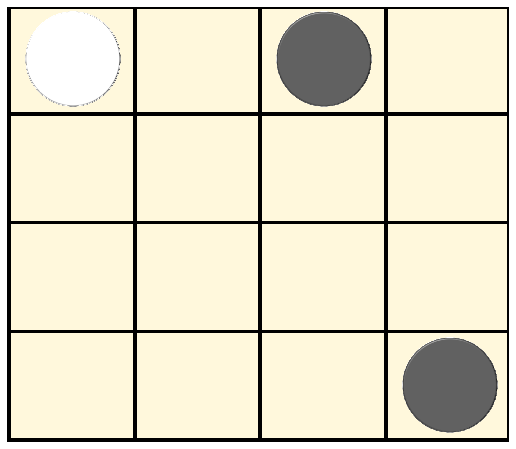

In [101]:
D = damas()
s = D.estado_inicial()
s = D.llenar(s)
print("Ficha :",ficha, "Movimiento :",movimiento_ficha)
print("Negra: ",D.negras)
print("Reinas Negras: ",D.reinas_negras)
print("Blancas: ",D.blancas)
print("Reinas Blancas: ",D.reinas_blancas)
print("Turno: ",D.turno)
D.pintar_estado(s)
ficha, movimiento_ficha, D = ab_decision(D, s)
time.sleep(1)

while D.test_objetivo(s) == False:
    clear_output(wait=True)
    ficha, movimiento_ficha, D = minimax_decision(D, s)
    s = D.transicion(s,ficha, movimiento_ficha)
    D.pintar_estado(s)
    print("Negra: ",D.negras)
    print("Reinas Negras: ",D.reinas_negras)
    print("Blancas: ",D.blancas)
    print("Reinas Blancas: ",D.reinas_blancas)
    print("Turno: ",D.turno)
    plt.show()
    time.sleep(1)

-----------

Ficha : (2, 0) Movimiento : (3, 1)
Negra:  [(3, 1)]
Reinas Negras:  []
Blancas:  [(2, 0)]
Reinas Blancas:  []
Turno:  2
Movimientos : Puntajes ->  {(2, 0): [0]}
Ficha:  (2, 0) Movimientos : [(1, 1)] Indice : 0


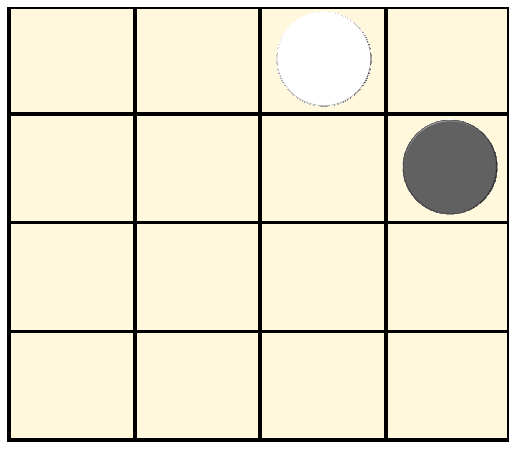

In [76]:
D = damas()
s = D.estado_inicial()
s = D.llenar1(s)
print("Ficha :",ficha, "Movimiento :",movimiento_ficha)
print("Negra: ",D.negras)
print("Reinas Negras: ",D.reinas_negras)
print("Blancas: ",D.blancas)
print("Reinas Blancas: ",D.reinas_blancas)
print("Turno: ",D.turno)
D.pintar_estado(s)
ficha, movimiento_ficha, D = ab_decision(D, s)

# References

<mark> <b>The bib file biblio.bib was not found

</b> </mark>(<a id="cit-lib1" href="#call-lib1">?</a>) !! _This reference was not found in biblio.bib _ !!

